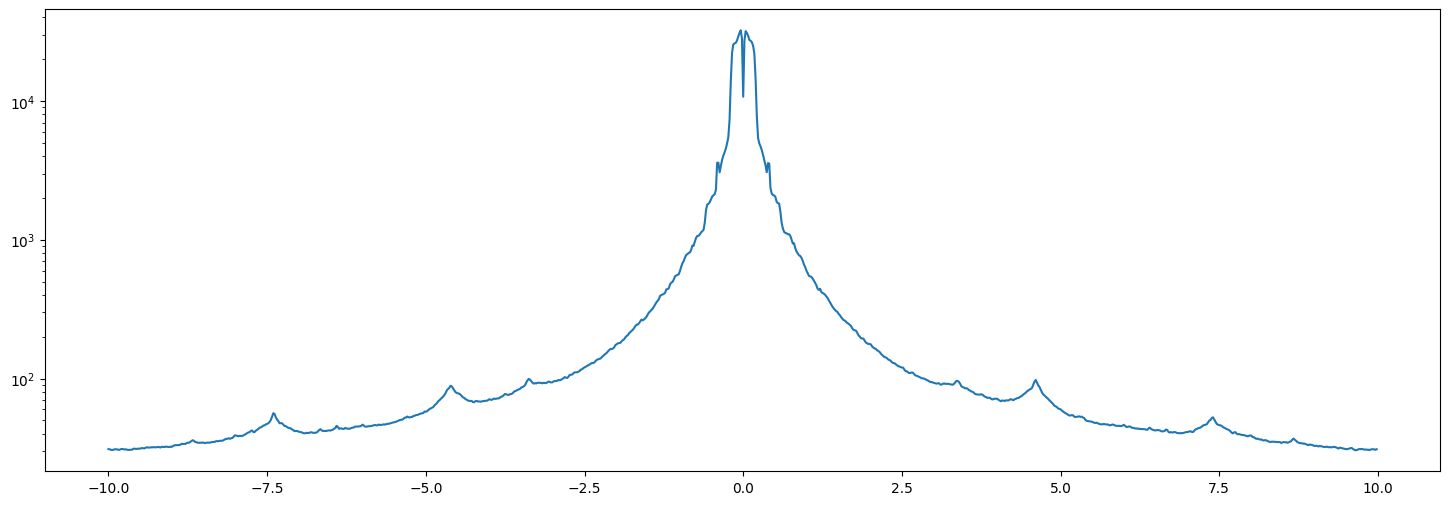

In [4]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

# Cargar el archivo .cs8
file_path = r'C:\Samples-Hack-RF\88108.cs8'

# Leer los datos IQ como enteros de 8 bits
with open(file_path, 'rb') as f:
    raw_data = np.frombuffer(f.read(), dtype=np.uint8)

# Convertir los datos en vectores IQ (asumiendo que IQ intercalado)
I = raw_data[0::2]  # Datos I en las posiciones pares
Q = raw_data[1::2]  # Datos Q en las posiciones impares

# # Opcionalmente, normalizar los valores I y Q
# I = (I - 128) / 128.0
# Q = (Q - 128) / 128.0

# Combinar I y Q en formato complejo
IQ_data = I + 1j * Q

f, Pxx = sig.welch(IQ_data[:20000000], fs=20, nperseg=1024, return_onesided=False)
f = np.fft.fftshift(f)
Pxx = np.fft.fftshift(Pxx)


plt.figure(figsize=(18,6))
plt.semilogy(f, Pxx)
plt.show()

In [ ]:
print('-----------I-----------------')
print(I[:2000])
print('-----------Q----------------')
print(Q[:2000])